# <span style='color:#FE774C'>GEBCO Bathymetry </span> Example Notebook

#### We recommend duplicating this notebook if you want to make changes to the code or run additional analysis
To do that simply right click on the file on the left panel and select "duplicate"

### The first part of this notebook will show how to pull data, and run visualizations using functions
### The second part uses a gui based approach

In [1]:
import odp.geospatial as odp
import warnings
warnings.filterwarnings("ignore")

In [2]:
db=odp.Database()
db_plt= odp.PlotTools()
gd=odp.GridData()

### Part 1: Using Functions

#### The following shows the available gridded datasets. To see tabular datasets, run *db.datasets_table* instead. 
#### Alternatively check out the data catalog in the [Ocean Data Explorer search bar](https://app.oceandata.earth/explorer)

In [3]:
gd.datasets_table

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
World Ocean Atlas 2018 Temperature - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",temperature celsius dtype: object
World Ocean Atlas 2018 Salinity - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Zweng, M. M., J. R. Reagan, D. Seidov, T. P. B...","global climatological trends, objectively anal...","[climatological distributions, salinity, objec...",salinity dimensionless dtype: object
World Ocean Atlas 2018 Oxygen - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, oxygen, objecti...",oxygen micromole per kilogram dtype: object
World Ocean Atlas 2018 Density - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, density, object...",density kilogram per cubic metere dtype: ob...
Vessel Traffic and CO2 Emissions,[HUB],Global gridded CO2 emissions and traffic densi...,Global CO2 emissions and total number of hours...,oceandata.earth,,None,"[emissions, vessels]",None
GEBCO gridded bathymetry data,[GEBCO],GEBCO's aim is to provide the most authoritati...,"GEBCO’s current gridded bathymetric data set, ...",https://www.gebco.net/data_and_products/gridde...,GEBCO Compilation Group (2021) GEBCO 2021 Grid...,global ocean and land terrain models,"[bathymetry, gridded, seabed, terrain]",depth meters dtype: object
World Ocean Atlas 2018 Temperature - 1degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia H.E., T.P. Boyer, O.K. Baranova, R.A. L...","global climatological trends, objectively anal...","[climatological distributions, atlas, temperat...",temperature celsius dtype: object
World Ocean Atlas 2018 Density - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Garcia, H. E., K. Weathers, C. R. Paver, I. Sm...","global climatological trends, objectively anal...","[climatological distributions, density, object...",density kilogram per cubic metere dtype: ob...
World Ocean Atlas 2018 Salinity - 0.25degree - yearly,"[NOAA, NCEI]","Objectively analyzed, quality controlled ocean...",This atlas consists of a description of data a...,https://www.ncei.noaa.gov/products/world-ocean...,"Zweng, M. M., J. R. Reagan, D. Seidov, T. P. B...","global climatological trends, objectively anal...","[climatological distributions, salinity, objec...",salinity dimensionless dtype: object


#### <span style='color:#3464eb'>To search for datasets with specific tags you can run:<span>

In [4]:
df_gd = gd.datasets_table
df_gd[['bathymetry' in x for x in df_gd['tags']]]

,provider_acronym,database_description,table_description,homepage,citation,subject,tags,units
name,,,,,,,,
GEBCO gridded bathymetry data,[GEBCO],GEBCO's aim is to provide the most authoritati...,"GEBCO’s current gridded bathymetric data set, ...",https://www.gebco.net/data_and_products/gridde...,GEBCO Compilation Group (2021) GEBCO 2021 Grid...,global ocean and land terrain models,"[bathymetry, gridded, seabed, terrain]",depth meters dtype: object


#### <span style='color:#3464eb'>You can also access citation information, units etc

In [5]:
gd.datasets_table.loc['GEBCO gridded bathymetry data'].citation

'GEBCO Compilation Group (2021) GEBCO 2021 Grid (doi:10.5285/c6612cbe-50b3-0cff-e053-6c86abc09f8f)'

In [6]:
gd.datasets_table.loc['GEBCO gridded bathymetry data'].units

depth    meters
dtype: object

## Pulling data - <span style='color:#FE774C'> GEBCO Bathymetry </span>


#### Insert the name of the table you are interested in into the query function
In this case we are intersted in GEBCO gridded bathymetry dataset<br>
The data is delivered to you in the form an [xarray](https://docs.xarray.dev/en/stable/) dataframe

In [7]:
ds=gd.open_dataset('GEBCO gridded bathymetry data')

In [8]:
ds

<xarray.Dataset>
Dimensions:    (lat: 43200, lon: 86400)
Coordinates:
    depth      float64 ...
  * lat        (lat) float64 -90.0 -89.99 -89.99 -89.99 ... 89.99 89.99 90.0
  * lon        (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
    time       datetime64[ns] ...
Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 dask.array<chunksize=(675, 2700), meta=np.ndarray>
Attributes: (12/36)
    Conventions:                     CF-1.6, ACDD-1.3
    comment:                         The data in the GEBCO_2021 Grid should n...
    creator_email:                   gdacc@seabed2030.org
    creator_name:                    GEBCO through the Nippon Foundation-GEBC...
    creator_type:                    International organisation
    creator_url:                     https://www.gebco.net
    ...                              ...
    node_offset:                     [1.0]
    project:                         Nippon Foundation - GEBCO Seabed2030 Pro...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    source:                          The GEBCO_2021 Grid is the latest global...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    title:                           The GEBCO_2021 Grid - a continuous terra...

### Take a slice of the bathymetry for an area of intereest
xarray has a built in slicing tool that allows us to take just a slice of all the data

In [9]:
ds_slice = ds.sel(lon=slice(0, 20), lat=slice(55, 70))


In [10]:
ds_slice

<xarray.Dataset>
Dimensions:    (lat: 3600, lon: 4800)
Coordinates:
    depth      float64 ...
  * lat        (lat) float64 55.0 55.01 55.01 55.01 ... 69.99 69.99 69.99 70.0
  * lon        (lon) float64 0.002083 0.00625 0.01042 ... 19.99 19.99 20.0
    time       datetime64[ns] ...
Data variables:
    crs        |S1 ...
    elevation  (lat, lon) int16 dask.array<chunksize=(300, 2700), meta=np.ndarray>
Attributes: (12/36)
    Conventions:                     CF-1.6, ACDD-1.3
    comment:                         The data in the GEBCO_2021 Grid should n...
    creator_email:                   gdacc@seabed2030.org
    creator_name:                    GEBCO through the Nippon Foundation-GEBC...
    creator_type:                    International organisation
    creator_url:                     https://www.gebco.net
    ...                              ...
    node_offset:                     [1.0]
    project:                         Nippon Foundation - GEBCO Seabed2030 Pro...
    references:                      DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c8...
    source:                          The GEBCO_2021 Grid is the latest global...
    summary:                         The GEBCO_2021 Grid is a continuous, glo...
    title:                           The GEBCO_2021 Grid - a continuous terra...

#### With built in xarray functions we can easily visualize the data

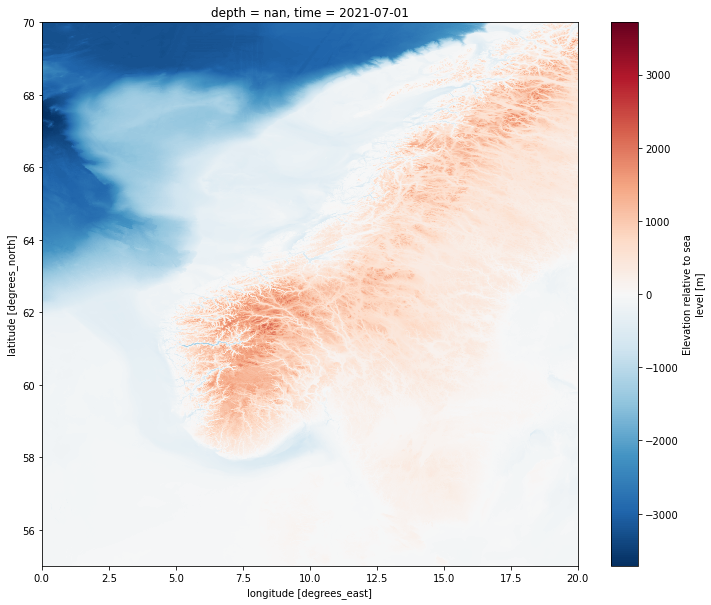

In [11]:
ds_slice.elevation.plot(figsize=(12,10))

#### You can also easily calculate min, max and mean

In [12]:
ds_slice.elevation.min().compute()

<xarray.DataArray 'elevation' ()>
array(-3714, dtype=int16)
Coordinates:
    depth    float64 nan
    time     datetime64[ns] 2021-07-01

In [13]:
ds_slice.elevation.max().compute()

<xarray.DataArray 'elevation' ()>
array(2338, dtype=int16)
Coordinates:
    depth    float64 nan
    time     datetime64[ns] 2021-07-01

### Part 2: Access through selector

Start selector GUI and select the Dataset you wish to pull from (here, GEBCO)
Then select the region of interest with the polygon drawing tool in the map. Note that boundary box of the polygon is used for the selection.The yellow box only represents where data is available

In [15]:
gd.selector()

Get the bathymetry within the polygon by calling the data_selection method in the odp sdk

In [ ]:
ds=gd.data_selection()
ds

You can run all the functions you ran above on the xarray dataframe as well

In [ ]:
ds.elevation.min().compute()

Plot the selected elevation data

In [ ]:
ds.elevation.plot(figsize=(12,10))